<a href="https://colab.research.google.com/github/nitish6121999/Capstone-project-Netflix-Movies-and-Tv-shows-clustering/blob/main/Netflix_Movies_and_Tv_shows_Clustering_Unsupervised_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX FLIMS AND TV SHOWS CLUSTERING



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Created by**    -   Nitish N Naik


# **Project Summary -**

The project aims to develop a clustering model for Netflix films and TV shows to enable better content recommendation and personalized viewing experiences for users. By leveraging machine learning and data analysis techniques, the project seeks to identify similar content based on various attributes such as genre, director, cast, and ratings.

The clustering model will be trained on a comprehensive dataset of Netflix films and TV shows, including information such as title, genre, release year, duration, director, cast, and user ratings. Initially, data preprocessing techniques will be applied to clean and standardize the dataset, ensuring its quality and consistency.

Next, a variety of clustering algorithms will be explored and compared to identify the most suitable approach for the given dataset. Algorithms such as k-means clustering, hierarchical clustering, and DBSCAN (Density-Based Spatial Clustering of Applications with Noise) may be considered. The choice of algorithm will depend on the characteristics of the dataset and the desired clustering outcomes.

![](https://www.thenews.com.pk/assets/uploads/updates/2022-09-03/987975_8751354_2_updates.jpg)

# **GitHub Link -**

https://github.com/nitish6121999/Capstone-project-Netflix-Movies-and-Tv-shows-clustering

# **Problem Statement**


The aim of this project is to perform clustering analysis on a dataset of Netflix movies and TV shows. Netflix is a popular streaming platform that offers a wide range of content. By clustering these movies and TV shows, we can identify similar content and gain insights into the underlying patterns and categories present in the Netflix library.

The specific tasks to be performed in this project include:

* Exploratory Data Analysis (EDA): Cleaned the data, unnested the Netflix content and tackled the null/missing values and conduct a thorough analysis of the dataset to uncover trends, patterns, and correlations among different attributes.

* Understanding Content Availability: Determine the types of content available in different countries and identify any variations or preferences.

* Analyzing Netflix's Focus: Investigate whether Netflix has been increasingly focusing on TV shows rather than movies in recent years.

* Clustering Similar Content: Utilize text-based features to cluster similar content,

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

#for Textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#for clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECTS/Project : unsupervised ML : Netflix flims and tv shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count


In [8]:
df.duplicated().sum()

0

It's good to see that we do not have any duplicated observation in our dataset.

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count

In [10]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
# Visualizing the missing values

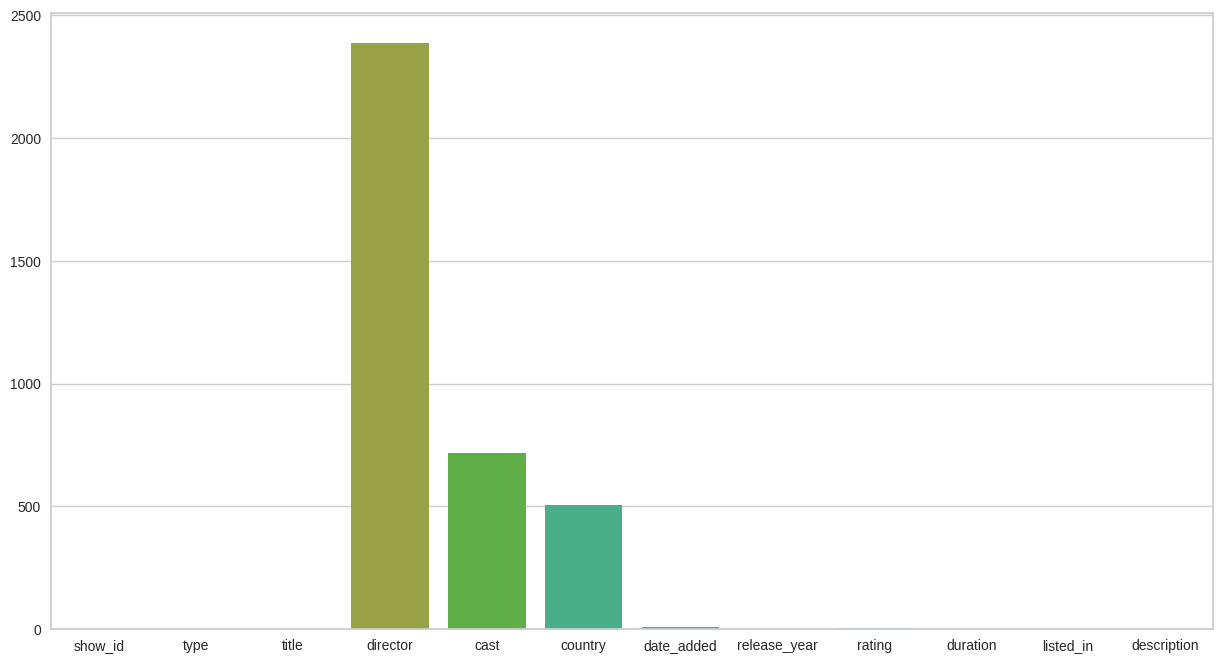

In [12]:
plt.figure(figsize=(15,8))
plots= sns.barplot(x=df.columns,y=df.isna().sum())

### What did you know about your dataset?

The Dataset consists of 12 columns, out of which only one column has an integer data type. The dataset does not contain any duplicate values. However, there are null values present in five columns: director, cast, country, date_added, and rating.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns

df.columns.to_list()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [14]:
# Dataset Describe

df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description


1.  show_id: Unique identifier for each movie/show.

2.  type: Indicates whether the entry is a movie or a TV show.

3.  title: Name of the movie or TV show.

4.  director: Name of the director(s) of the movie or TV show.

5.  cast: Names of the actors and actresses featured in the movie or TV show.

6.  country: Country or countries where the movie or TV show was produced.

7.  date_added: Date when the movie or TV show was added to Netflix.

8.  release_year: Year when the movie or TV show was released.

9.  rating: TV rating or movie rating of the movie or TV show.

10.  duration: Length of the movie or TV show in minutes or seasons.

11. listed_in: Categories or genres of the movie or TV show.

12. description: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
# treating null values

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

We have null values for columns country ,date added ,cast and director

In [18]:
null_value_percent = (df.isnull().sum()/len(df))*100
null_value_percent

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [19]:
#treating director column
df[['director','cast']]=df[['director','cast']].fillna('unknown')

In [20]:
df['country']=df['country'].fillna(df['country'].mode()[0])

In [21]:
df.dropna(axis=0, inplace=True)

Checking for null value after manupulation

In [22]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [23]:
df['director']

0                 unknown
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784              unknown
7785              unknown
7786             Sam Dunn
Name: director, Length: 7770, dtype: object

In [24]:
#creating the copy of dataset
df1=df.copy()

When working with pandas DataFrames, using the copy() method is important in certain scenarios to avoid unintentional data modification and maintain data integrity.

Bining of Rating column


*   Adult Content: TV-MA, NC-17, R
*   Children Content: TV-PG, PG, TV-G, G
*   Teen Content: PG-13, TV-14
*   Family-friendly Content: TV-Y, TV-Y7, *   TV-Y7-FV
*   Not Rated: NR, UR



In [25]:
rating_description = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df1['rating'].replace(rating_description, inplace = True)
df1['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [26]:
# Convertng string object to datetime object of date_added column
df1['date_added']= pd.to_datetime(df1['date_added'])

# Extracting date, day, month and year from date_added column
df1["day_added"]= df1["date_added"].dt.day
df1["month_added"]= df1["date_added"].dt.month
df1["year_added"]= df1["date_added"].dt.year


In [27]:
df1.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,Adult Content,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,Adult Content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,Adult Content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,Teen Content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,Teen Content,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,Adult Content,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1,7,2017
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,Adult Content,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",1,6,2020
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,Adult Content,119 min,Dramas,After one of his high school students attacks ...,1,11,2019
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,Teen Content,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",1,4,2019
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,Adult Content,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,15,12,2017


Creating separate dataframes for visualization of the content

In [28]:
df_movies=df1[df1['type']=='Movie']
df_tvshows=df1[df1['type']=='TV Show']

In [29]:
df_movies.shape

(5372, 15)

In [30]:
df_tvshows.shape

(2398, 15)

### What all manipulations have you done and insights you found?

1.   Dropping off the null values and treating them with proper values .
2. The Date added columns is been splited to theirs date ,month and year this will be helpful in visulaisation of data accordingly
3. Bining for rating columns



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Chart 1: Type of content Distribution in the dataset**

Text(0.5, 1.0, 'Distribution of content Type ')

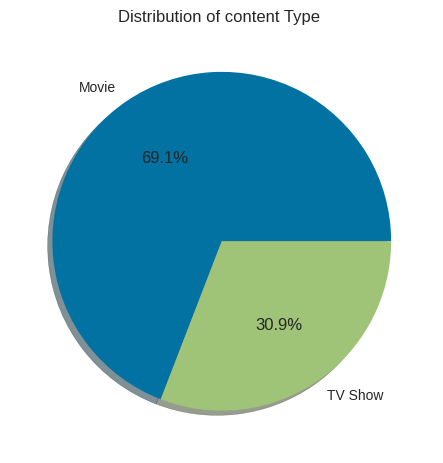

In [31]:
# Chart - 1 visualization code
Type_count=df['type'].value_counts()
#plt.pie(type_counts, labels=type_counts.index,colors=['#B7C3F3','#DD7596'],explode=(0, 0.1),shadow=True, autopct='%1.1f%%',startangle=90)

#ploting for Type count
plt.pie(Type_count, labels=Type_count.index,autopct='%1.1f%%',shadow=True)
plt.title('Distribution of content Type ')

##### 1. Why did you pick the specific chart?

This graph shows us the percent of TV shows and movie data present on Netflix Data set

##### 2. What is/are the insight(s) found from the chart?

Most of the content is of movies i.e around 70% and tv shows is of 30%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix understands what content has to be displayed , tv shows content is less compared to movies , they can add or delete the data according to the customers interest

# **Chart - 2: Top actors in movies and tv shows**

Text(0.5, 1.0, '**Top actors in movies **')

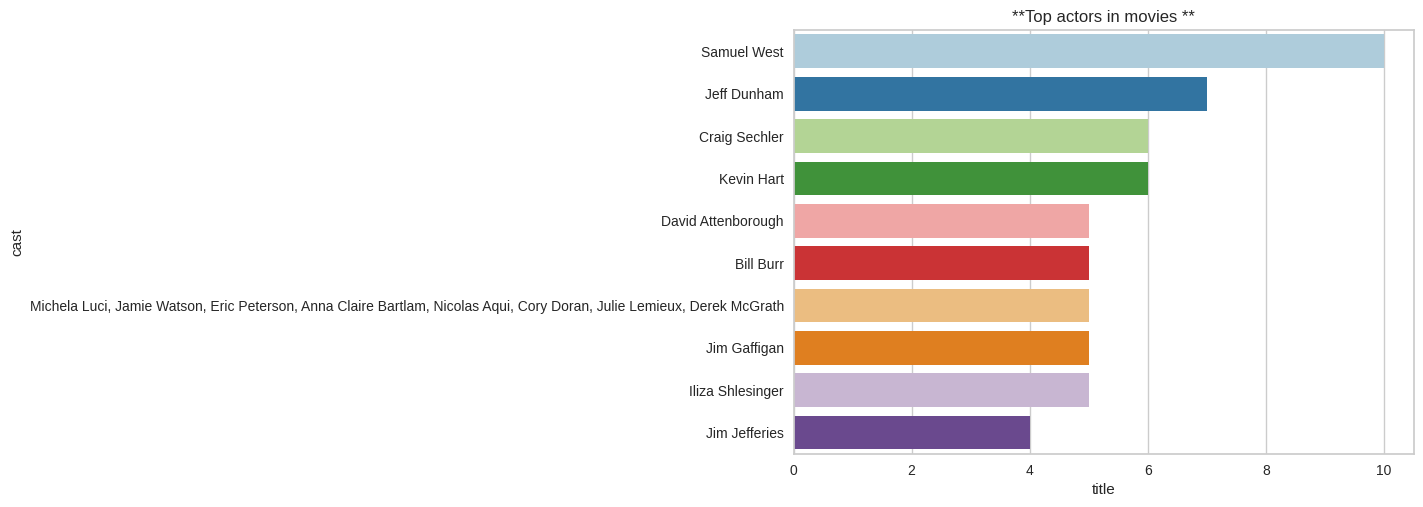

In [32]:

top_cast_mov=df_movies.groupby(['cast'])['title'].nunique().reset_index().sort_values(by='title',ascending=False)[1:11]
plots= sns.barplot(y = "cast",x = 'title', data = top_cast_mov, palette='Paired')
plt.title('**Top actors in movies **')


Text(0.5, 1.0, '**Top actors in tv shows**')

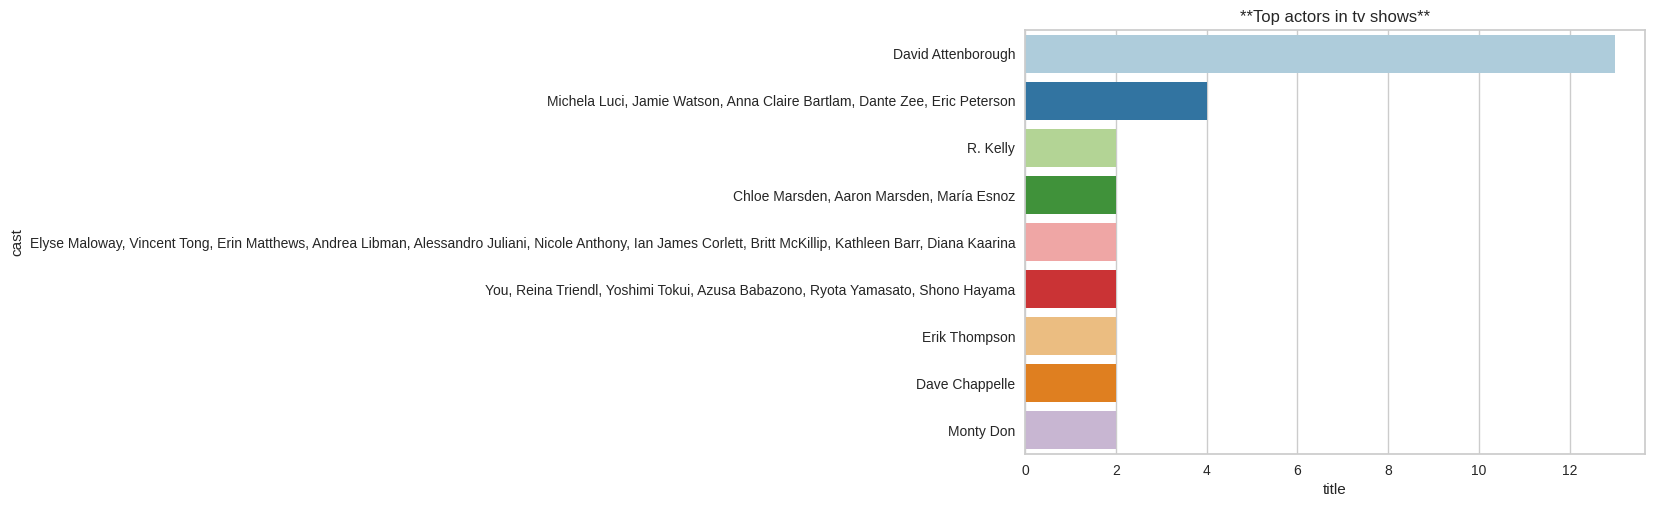

In [33]:
top_cast_tv=df_tvshows.groupby(['cast'])['title'].nunique().reset_index().sort_values(by='title',ascending=False)[1:10]
plots= sns.barplot(y = "cast",x = 'title', data = top_cast_tv, palette='Paired')
plt.title('**Top actors in tv shows**')


##### 1. Why did you pick the specific chart?

Column chart shows the top 10 cast in movies and tv shows

##### 2. What is/are the insight(s) found from the chart?

Top 10 cast in both movies and tv shows ,which means they are popular and pepople look for their content

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customers look for actors and content which are popular in streaming platforms

# **Chart - 3: Top Directors in the dataset**

Text(0.5, 1.0, '**Top Directors in movies**')

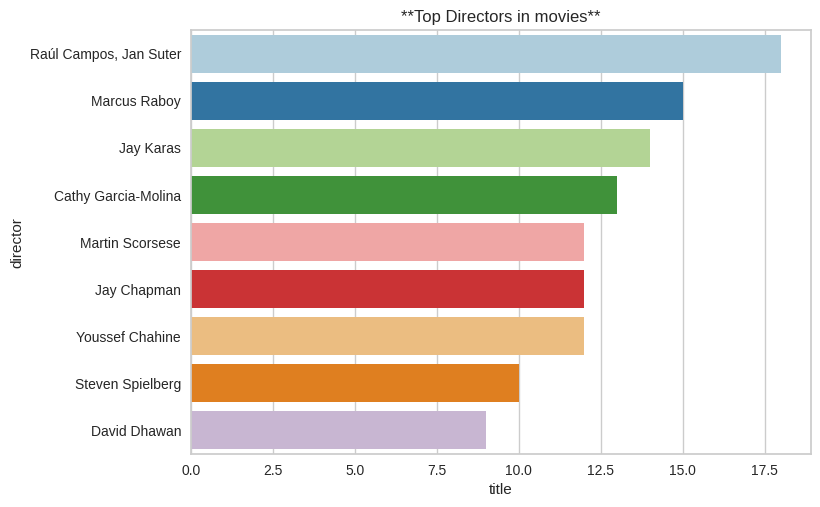

In [34]:
# Chart - 3 visualization code

top_directors=df_movies.groupby(['director'])['title'].nunique().reset_index().sort_values(by='title',ascending=False)[1:10]
plots= sns.barplot(y = "director",x = 'title', data = top_directors, palette='Paired')
plt.title('**Top Directors in movies**')

Text(0.5, 1.0, '**Top Directors in tv shows**')

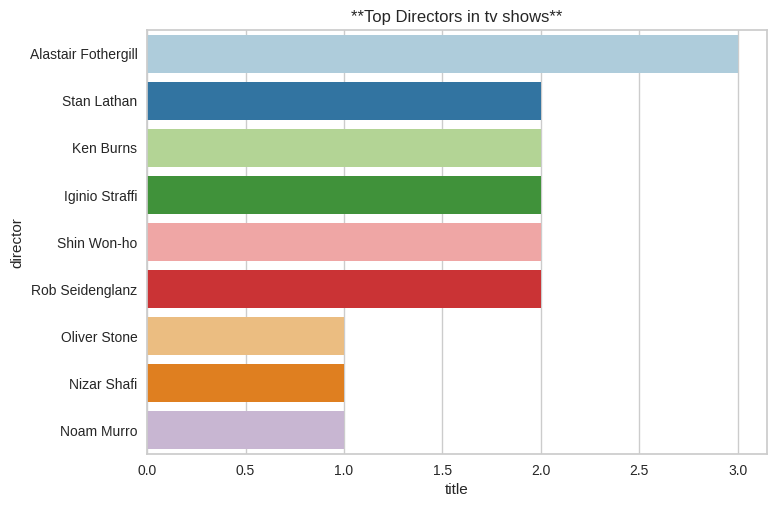

In [35]:
top_directors_tv=df_tvshows.groupby(['director'])['title'].nunique().reset_index().sort_values(by='title',ascending=False)[1:10]
plots= sns.barplot(y = "director",x = 'title', data = top_directors_tv, palette='Paired')
plt.title('**Top Directors in tv shows**')

##### 1. Why did you pick the specific chart?

To know which director is popular in Movies and which one is popular in TV Shows.

##### 2. What is/are the insight(s) found from the chart?

We found that most of the movies directed by Raul ,Jan suter.

Most TV shows directed by Alastair

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Movie/tvshows producers can select the popular director for their upcoming projects

# **Chart - 4: Rating distirbution in the dataset**


Text(0.5, 1.0, '**Rating distirbution in the Overall dataset**')

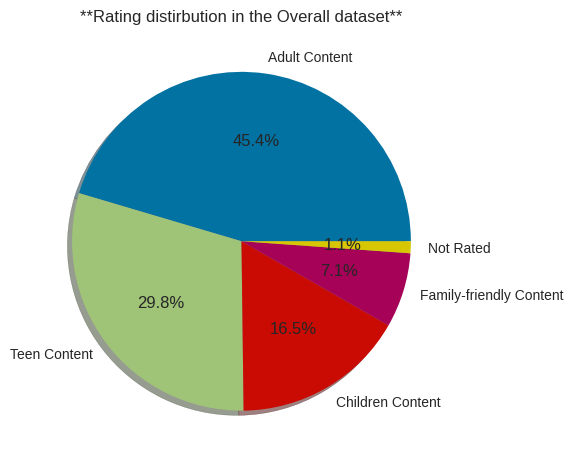

In [36]:
# Chart - 4 visualization code

overall=df1['rating'].value_counts()
plt.pie(overall, labels=overall.index,autopct='%1.1f%%',shadow=True)
plt.title('**Rating distirbution in the Overall dataset**')

Text(0.5, 1.0, '**Rating distirbution in the movies dataset**')

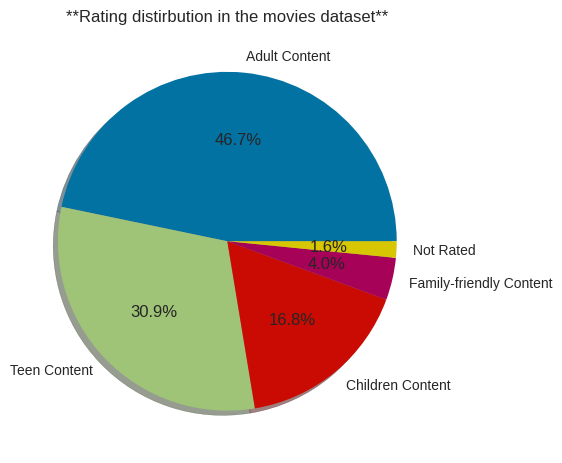

In [37]:
movies_rate=df_movies['rating'].value_counts()
plt.pie(movies_rate, labels=movies_rate.index,autopct='%1.1f%%',shadow=True)
plt.title('**Rating distirbution in the movies dataset**')

Text(0.5, 1.0, '**Rating distirbution in the tv shows dataset**')

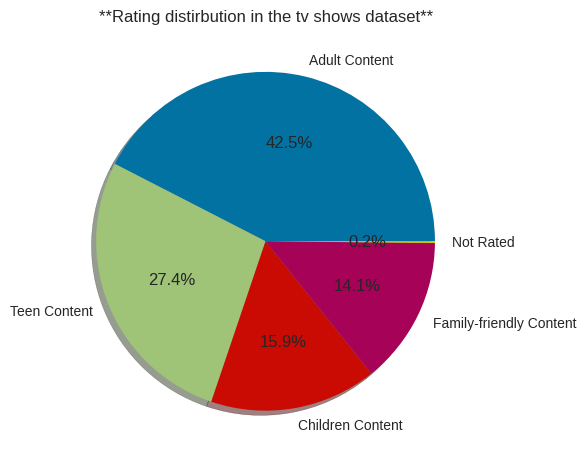

In [38]:
Tv_rate=df_tvshows['rating'].value_counts()
plt.pie(Tv_rate, labels=Tv_rate.index,autopct='%1.1f%%',shadow=True)
plt.title('**Rating distirbution in the tv shows dataset**')

##### 1. Why did you pick the specific chart?

Ratings of the content in percentage

##### 2. What is/are the insight(s) found from the chart?

Adult content is highest in all of the sections

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Nowadays even children use the online streaming sources , since the adult content is all over the place , the platforms will have to come up with kidzone section for age below 18

# **Chart - 5: Which country has highest Movies and tv shows**

Text(0.5, 1.0, '**country wise highest Movies**')

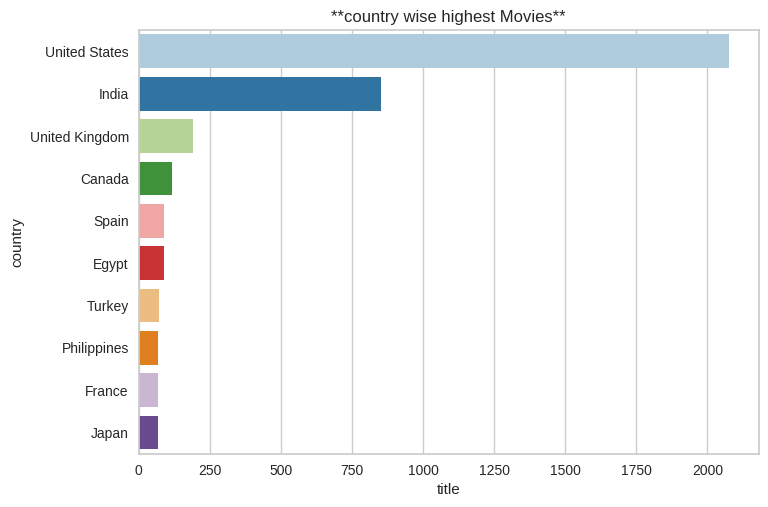

In [39]:
# Chart - 5 visualization code
country_wise=df_movies.groupby(['country'])['title'].nunique().reset_index().sort_values(by='title',ascending=False)[0:10]
plots= sns.barplot(y = "country",x = 'title', data = country_wise, palette='Paired')
plt.title('**country wise highest Movies**')

Text(0.5, 1.0, '**country wise highest Movies **')

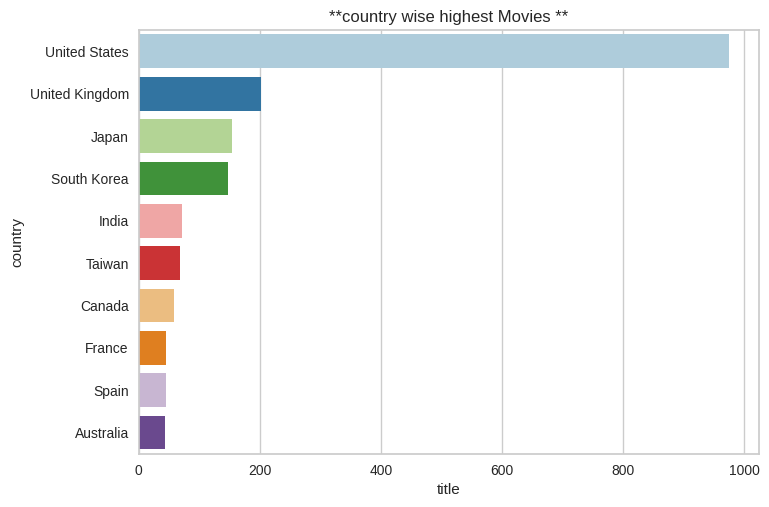

In [40]:
country_wise=df_tvshows.groupby(['country'])['title'].nunique().reset_index().sort_values(by='title',ascending=False)[0:10]
plots= sns.barplot(y = "country",x = 'title', data = country_wise, palette='Paired')
plt.title('**country wise highest Movies **')

##### 1. Why did you pick the specific chart?

Bar chart tells which country produces Maximum number of TV Shows and Movies.



##### 2. What is/are the insight(s) found from the chart?

The analysis reveals that the United States holds the position of the leading country in producing both movies and TV shows on Netflix. This observation suggests a significant influence of American content on the platform.

Furthermore, India emerges as the second-highest producer of movies on Netflix, signaling the increasing global popularity of Bollywood movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Netflix benefits from a wide range of American and Bollywood content, attracting global audiences and supporting business growth.

# **Chart - 6:  Which country has highest overall distribution of the content**

Text(0.5, 1.0, '**country wise highest Movies and tv shows**')

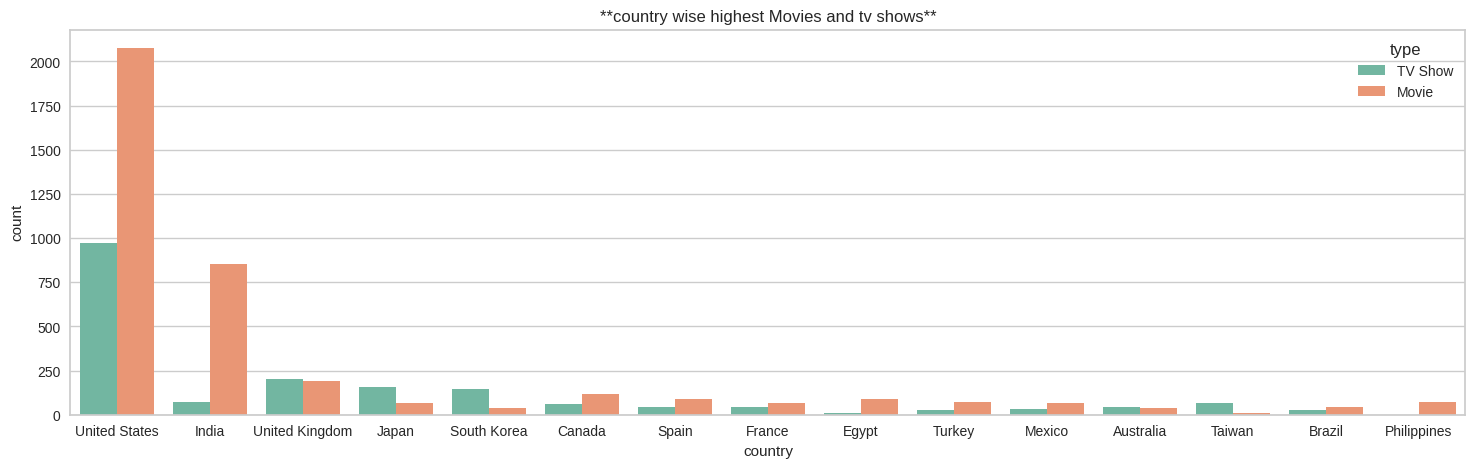

In [41]:
from matplotlib import figure
# Chart - 6 visualization code
plt.figure(figsize=(18,5))
sns.countplot(x=df1['country'],order=df1['country'].value_counts().index[0:15],hue=df['type'],palette ="Set2")
plt.title('**country wise highest Movies and tv shows**')

##### 1. Why did you pick the specific chart?

columns chart tells which country produces Maximum number of TV Shows and Movies with Type.


##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The United States stands as the primary producer of movies and TV shows on Netflix, showcasing the platform's significant reliance on American content.

In addition, India's emergence as the second-highest producer of movies on Netflix highlights the growing global appeal of Bollywood films.

# **Chart - 7: Popular geners in the overall content**

In [42]:
# Chart - 7 visualization code

gener=df1.groupby(['listed_in'])['title'].nunique().reset_index().sort_values(by='title',ascending=False)[0:10]
gener

import plotly.express as px
fig=px.bar(gener,x='listed_in',y='title',color="listed_in", title="Popular geners in dataset" )
fig.show()

##### 1. Why did you pick the specific chart?

It shows the popular geners distribution

##### 2. What is/are the insight(s) found from the chart?

The most popular genre in both the TV Shows and Movies category on Netflix is international movies, with drama and comedy genres following closely behind.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights obtained from the analysis can positively impact Netflix's business by providing a deeper understanding of its audience's preferences in terms of genres and content types. This knowledge enables Netflix to strategically acquire and produce content that aligns with viewer preferences, resulting in increased engagement, customer satisfaction, and ultimately, business success.






# **Chart - 8: Yearly release of the content**

Text(0.5, 1.0, '**Yearly release of the content**')

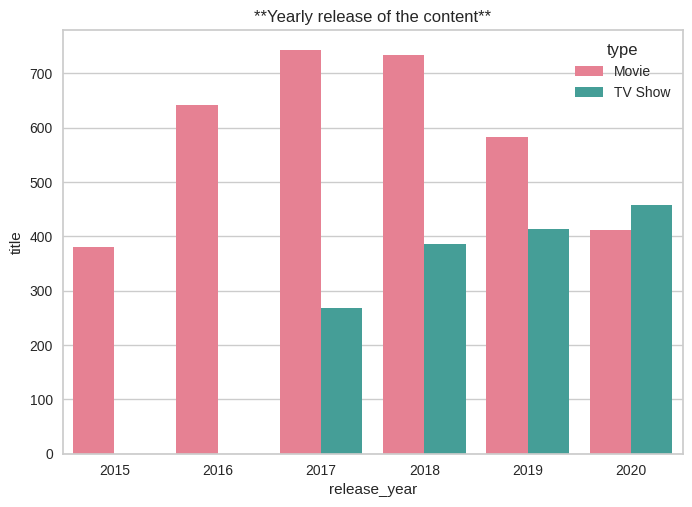

In [43]:
# Chart - 8 visualization code
r=df1.groupby(['release_year','type'])['title'].nunique().reset_index().sort_values(by=['title'],ascending=False)[0:10]
sns.barplot(x = 'release_year',y= 'title',hue='type', data = r, palette='husl')
plt.title('**Yearly release of the content**')

##### 1. Why did you pick the specific chart?

To show the yearly release of the content

##### 2. What is/are the insight(s) found from the chart?

In the recent years the content distribution being released in almost equal.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Netflix understands the popularity of the content after being released and can be used be marketing.

# **Chart - 9: Yearly movie and tv shows released**

Text(0.5, 1.0, '**Yearly movie and tv shows released**')

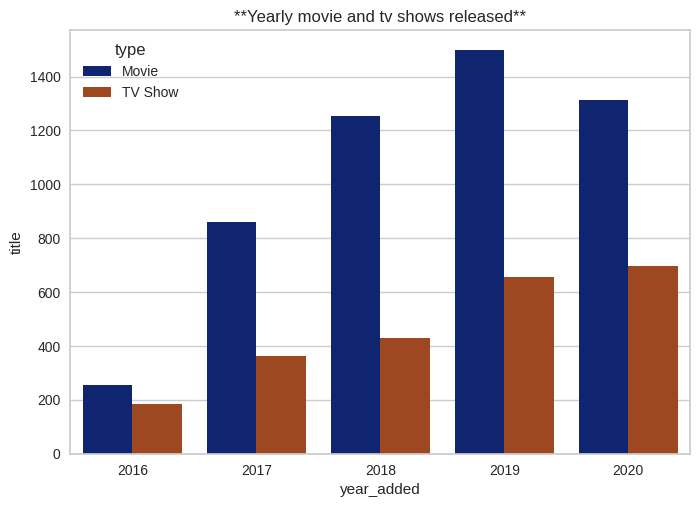

In [44]:
# Chart - 9 visualization code
r=df1.groupby(['year_added','type'])['title'].nunique().reset_index().sort_values(by=['title'],ascending=False)[0:10]
sns.barplot(x = 'year_added',y= 'title',hue='type', data = r, palette='dark')
plt.title('**Yearly movie and tv shows released**')

##### 1. Why did you pick the specific chart?

Yearly release of the content in platform

##### 2. What is/are the insight(s) found from the chart?

Movies content is more than tv shows

Tv shows adding to the netflix has been increased gradually

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Content and type of content has been added according to the popularity and customers interests

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation
df1.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_added       0
month_added     0
year_added      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We had four columns were we had null/missing values ,we have treated them with dropna , fillna

### 2. Handling Outliers

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  day_added     7770 non-null   int64         
 13  month_added   7770 non-null   int64         
 14  year_added    7770 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object

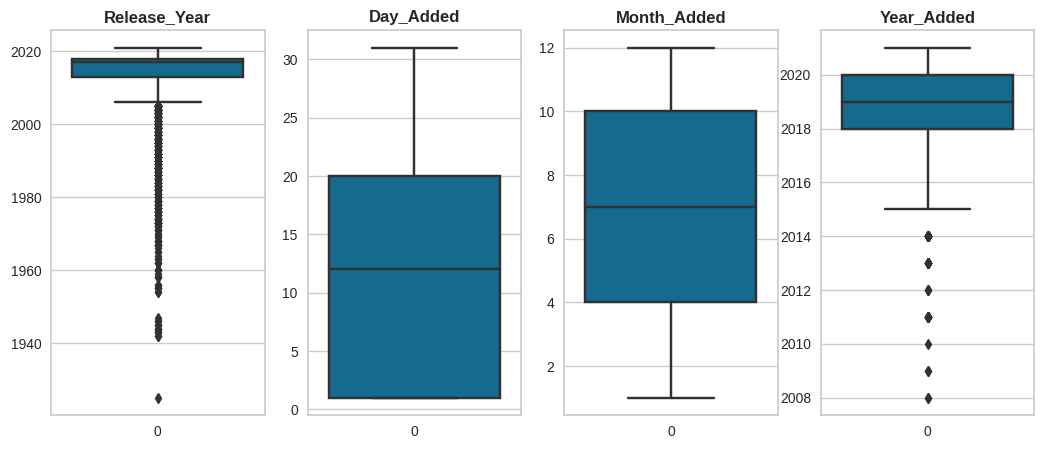

In [47]:
Numerical_col= ["release_year","day_added","month_added","year_added"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(Numerical_col):
  plt.subplot(1, 5, n+1)
  sns.boxplot(df1[column])
  plt.title(f'{column.title()}',weight='bold')
  #plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Boxplot ,where we can visualise the numerical content with outlier datapoints .

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Concatenate the categorical columns used in text preprocesing

In [48]:
# Encode your categorical columns
df1["content"]= df1["cast"]+" "+df1["director"]+" "+df1["listed_in"]+" "+df1["type"]+" "+df1["rating"]+" "+df1["country"]+" "+df1["description"]
df1['content']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784    Nasty C unknown Documentaries, International M...
7785    Adriano Zumbo, Rachel Khoo unknown Internation...
7786    unknown Sam Dunn Documentaries, Music & Musica...
Name: content, Length: 7770, dtype: object

#### 2. Lower Casing

In [49]:
# Lower Casing
df1['content']=df1['content'].str.lower()
df1.iloc[0]['content']

'joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi unknown international tv shows, tv dramas, tv sci-fi & fantasy tv show adult content brazil in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 3. Removing Punctuations

In [50]:
# Remove Punctuations
def remove_punc(text):
  '''This function will remove the punctuations in the text'''
  import string

  translator=str.maketrans('','',string.punctuation)
  return text.translate(translator)

In [51]:
df1['content']=df1['content'].apply(remove_punc)

df1['content'][0]

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi unknown international tv shows tv dramas tv scifi  fantasy tv show adult content brazil in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

#### 4. Removing URLs & Removing words and digits contain digits.

In [52]:
def url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text


In [53]:
df1['content']=df1['content'].apply(url_and_numbers )

df1['content'][0]

'jo o miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez  motta celso frateschi unknown international tv shows tv dramas tv scifi  fantasy tv show adult content brazil in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the   saved from squalor'

#### 5. Removing Stopwords & Removing White spaces

In [54]:
# Remove Stopwords
nltk.download('stopwords')

stop_words=stopwords.words("english")

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
def stopwords(text):
  text = [word for word in text.split() if not word in stop_words]

    # joining the list of words with space separator
  text=  " ".join(text)

    # removing whitespace
  text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
  return text

In [56]:
df1['content']=df1['content'].apply(url_and_numbers )

df1['content'][0]

'jo o miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez  motta celso frateschi unknown international tv shows tv dramas tv scifi  fantasy tv show adult content brazil in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the   saved from squalor'

#### 6. Tokenization

In [57]:
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
#df1['content']= df1['content'].apply(nltk.word_tokenize)

# Define a tokenization function
def tokenize_text(text):
    return nltk.word_tokenize(text)

# Apply tokenization to the 'text' column
df1['content'] = df1['content'].apply(tokenize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
df1['content'][0]

['jo',
 'o',
 'miguel',
 'bianca',
 'comparato',
 'michel',
 'gomes',
 'rodolfo',
 'valente',
 'vaneza',
 'oliveira',
 'rafael',
 'lozano',
 'viviane',
 'porto',
 'mel',
 'fronckowiak',
 'sergio',
 'mamberti',
 'zez',
 'motta',
 'celso',
 'frateschi',
 'unknown',
 'international',
 'tv',
 'shows',
 'tv',
 'dramas',
 'tv',
 'scifi',
 'fantasy',
 'tv',
 'show',
 'adult',
 'content',
 'brazil',
 'in',
 'a',
 'future',
 'where',
 'the',
 'elite',
 'inhabit',
 'an',
 'island',
 'paradise',
 'far',
 'from',
 'the',
 'crowded',
 'slums',
 'you',
 'get',
 'one',
 'chance',
 'to',
 'join',
 'the',
 'saved',
 'from',
 'squalor']

#### 7. Text Normalization

In [59]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [60]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [61]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df1['content']= df1['content'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df1.iloc[281,]['content']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedy international movie scifi fantasy movie teen content india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

##### Which text normalization technique have you used and why?

Lemmatization aims to determine the base or dictionary form of a word (known as the lemma), taking into account its part of speech and context. This results in more linguistically accurate lemmas compared to stemming, which simply truncates words without considering their grammatical role. Lemmatization produces meaningful and valid words that are easier to interpret and understand.

#### 8. Text Vectorization

In [62]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

tfid=TfidfVectorizer(max_df = 0.9,min_df = 1,max_features=10000)

In [63]:
x=tfid.fit_transform(df1['content'])

In [64]:
x

<7770x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 283323 stored elements in Compressed Sparse Row format>

##### Which text vectorization technique have you used and why?

TF-IDF (Term Frequency-Inverse Document Frequency) is a popular text vectorization technique that assigns weights to words based on their frequency in a document and their rarity across all documents in a corpus. TF-IDF is widely used because it offers several benefits:



### 7. Dimesionality Reduction

**Dimensionality reduction** is a process used to reduce the number of features or variables in a dataset while preserving as much relevant information as possible. It is a crucial step in data preprocessing and analysis, particularly when dealing with high-dimensional data.

**Principal Component Analysis** (PCA) is a popular dimensionality reduction technique that aims to transform a high-dimensional dataset into a lower-dimensional space while preserving the most important information. PCA achieves this by finding a set of orthogonal axes, known as principal components, that capture the maximum variance in the data.

In [65]:
from sklearn.decomposition import PCA
transformer = PCA()
transformer.fit(x.toarray())

PCA()

Text(0, 0.5, 'cumulative explained variance')

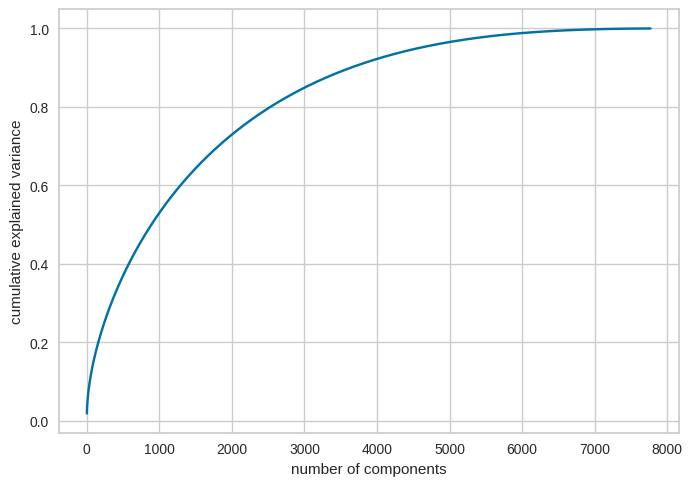

In [66]:
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [67]:
pca_tuned = PCA(n_components=0.85)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed2 = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed2.shape

(7770, 3011)

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction can often be beneficial when working with high-dimensional text data.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.

Dimensionality reduction is often needed in many data analysis tasks, especially when dealing with high-dimensional datasets. Here are some reasons why dimensionality reduction is necessary:

* Curse of Dimensionality

* Improved Computational Efficiency

* Visualization and Interpretability




## ***7. ML Model Implementation***

# **ML Model - K Means Clustering**

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into K clusters. It aims to group similar data points together based on their feature similarity. Here's an overview of how the K-means clustering algorithm works:

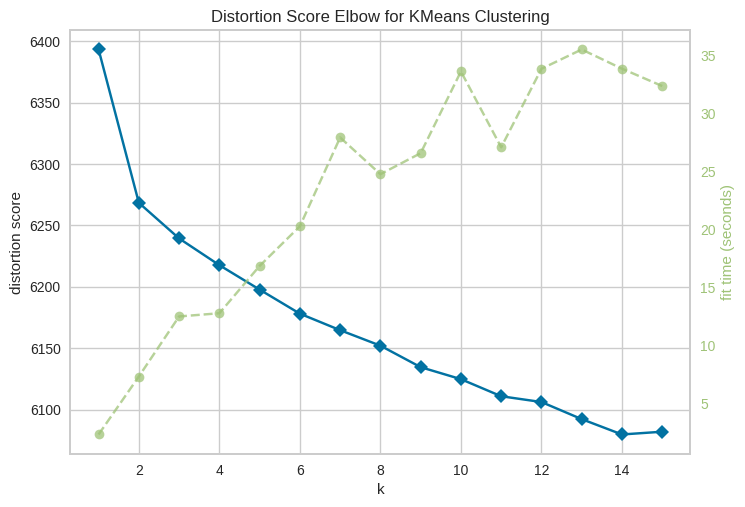

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed2)

# viusalise the K value
visualizer.show()

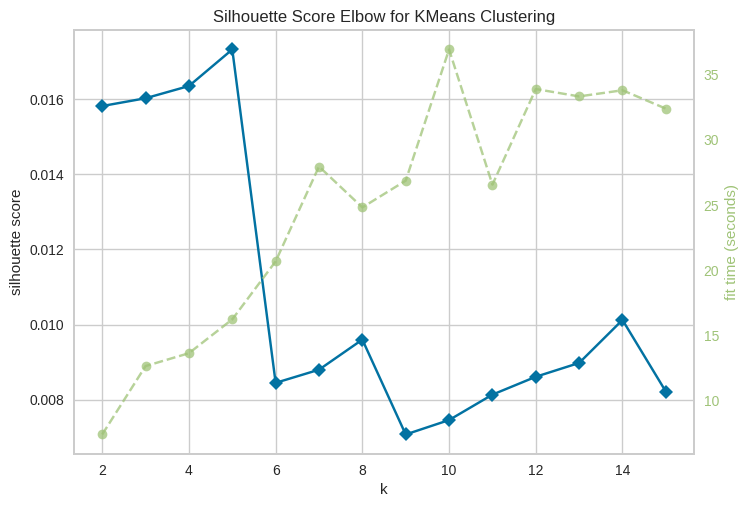

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [69]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed2)

# visualise the k value
visualizer.show()

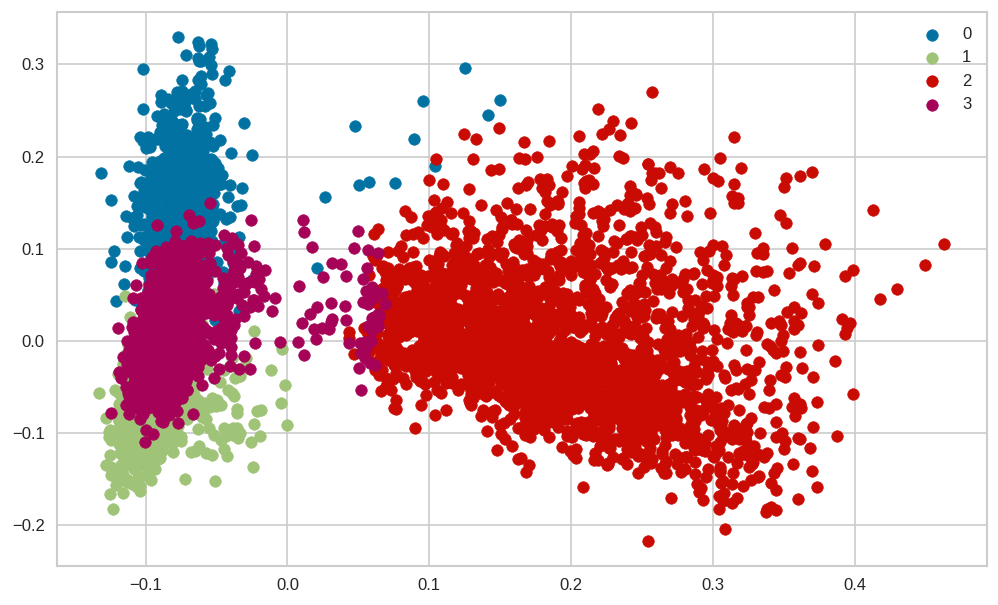

In [70]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed2)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed2[label == i , 0] , x_transformed2[label == i , 1] , label = i)
plt.legend()
plt.show()

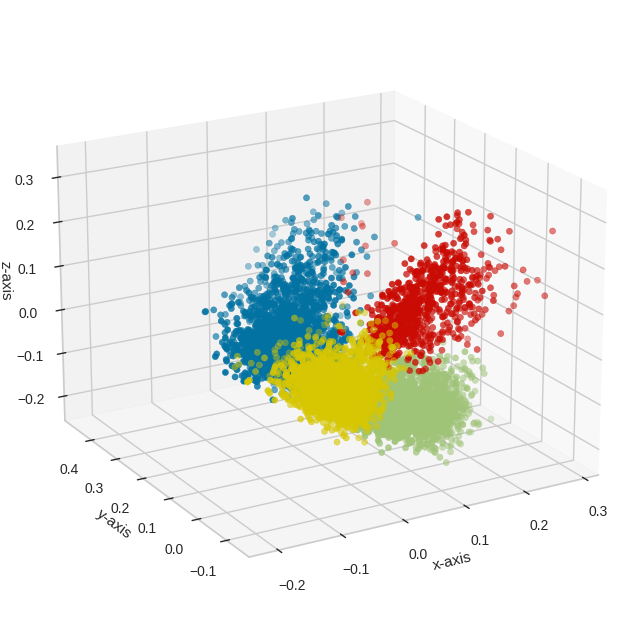

In [71]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed2[kmeans.labels_ == i, 2], x_transformed2[kmeans.labels_ == i, 0], x_transformed2[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [72]:
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed2)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.013548
k=3, Silhouette score=0.012340
k=4, Silhouette score=0.013242
k=5, Silhouette score=0.003859
k=6, Silhouette score=0.005657


In [73]:
df1['labels']=kmeans.labels_

In [74]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,content,labels
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,Adult Content,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,jo o miguel bianca comparato michel gomes rodo...,2
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,Adult Content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,demi n bichir h ctor bonilla oscar serrano aza...,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,Adult Content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,tedd chan stella chung henley hii lawrence koh...,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,Teen Content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,elijah wood john c reilly jennifer connelly ch...,3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,Teen Content,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,jim sturgess kevin spacey kate bosworth aaron ...,3


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df1[['labels', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['labels'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

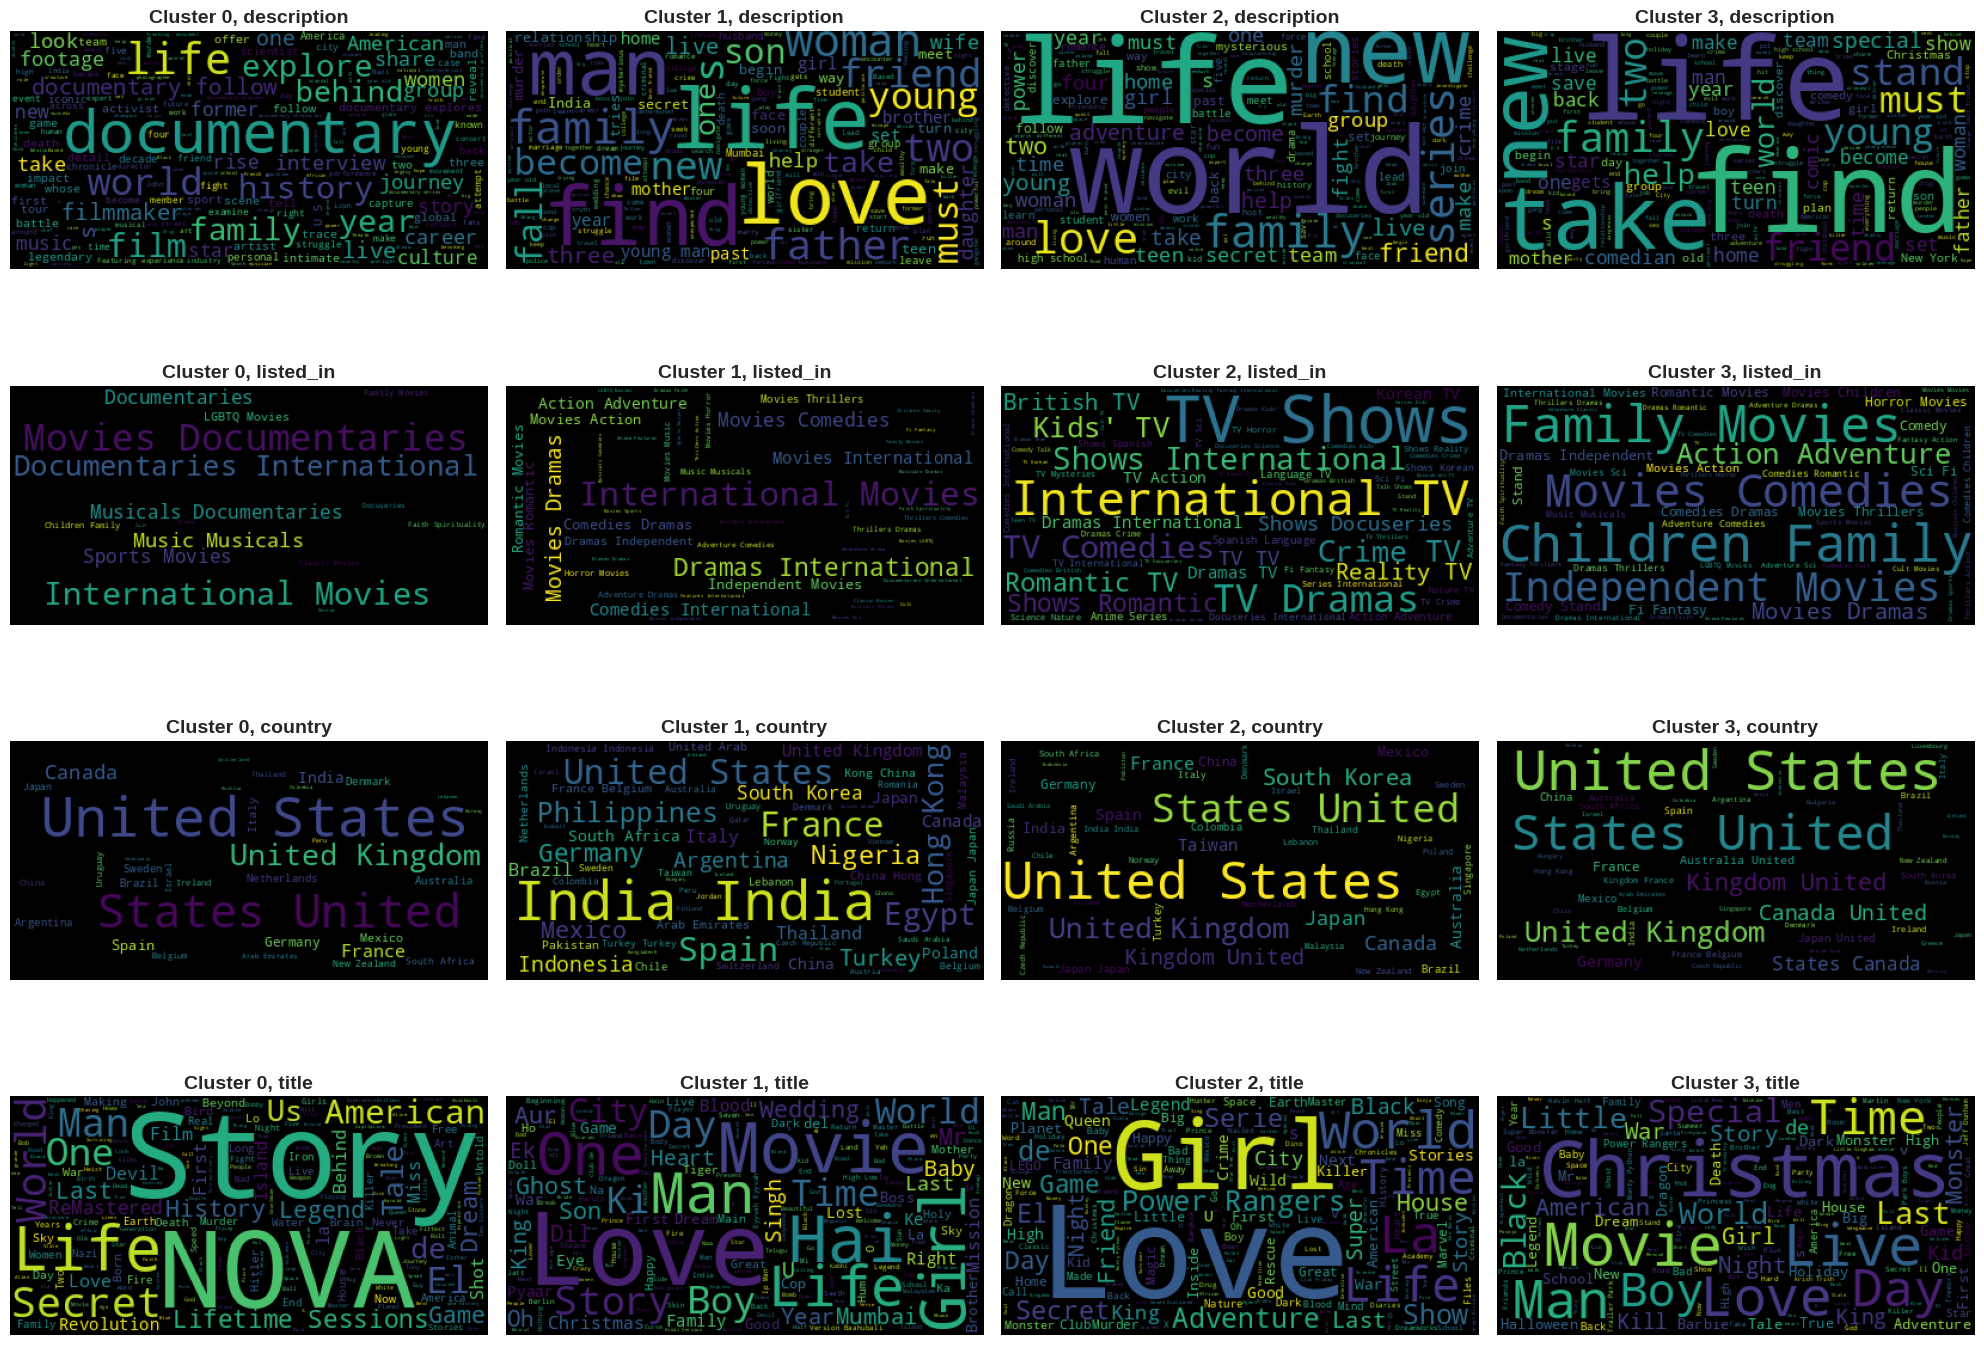

In [76]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Visualizing evaluation Metric Score** help quantify the quality of clustering results and can be used to assess the positive business impact. They provide insights into the compactness, separation, and overall effectiveness of the clustering algorithm in organizing and grouping the data. By evaluating these metrics, businesses can assess the effectiveness of k-means clustering in various applications such as customer segmentation, anomaly detection, or market analysis, ultimately determining its impact on their business goals.**bold text**

#### 1.Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating the performance of the created models, we have chosen K-means clustering as our final prediction model. The decision is based on several factors.

* The K-means clusters were visually observed to be well-separated from each other in a three-dimensional representation. This further reinforced the notion that the K-means model successfully distinguished and grouped the data points based on their similarities.

* Taking these factors into consideration, we concluded that K-means clustering is the most suitable ML model for our prediction task. Its ability to achieve a high Silhouette Score and generate well-separated clusters enhances our confidence in its performance and predictive capabilities.

# **Recommender system**

A recommender system is a software or algorithmic approach that analyzes user preferences and behaviors to provide personalized recommendations for items or content. It is widely used in various industries, such as e-commerce, entertainment, and online platforms, to help users discover new items of interest.

By incorporating clustering into the recommender system, you can capture finer-grained patterns and preferences within each cluster, leading to more personalized and targeted recommendations. This can ultimately enhance the user experience, increase engagement, and potentially improve business outcomes.

In [77]:

# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df1['content'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_movie(title, cosine_sim=cosine_sim, data=df1):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_score = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)[1:7]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_score]
    rec_movie = data['title'].iloc[recommend_index]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.Series(list(rec_movie))

    return rec_movie


In [78]:
# recommendation for the Indian movie
recommend_movie('Kuch Kuch Hota Hai')

3282    Kabhi Khushi Kabhie Gham
2692               Hello Brother
3233                      Judwaa
3280      Kabhi Alvida Naa Kehna
3477                   Kya Kehna
1265               Chalte Chalte
Name: title, dtype: object

# **Conclusion**

# **EDA Insights**

Based on the exploratory data analysis (EDA) of the Netflix movies and TV shows clustering dataset, the following conclusions can be drawn:

1. Content Distribution: Movies constitute approximately two-thirds of the total content on Netflix, while TV shows make up the remaining one-third.

2.  Genre Distribution: Adult and teen categories dominate the content on Netflix, with family-friendly content being more prevalent in TV shows compared to movies.


3.  Director Analysis: Roass,Jan Suter emerges as the most common movie director on Netflix, while Ken Burns takes the lead for TV show direction.

4.  Country Productions: The United States is the largest producer of both movies and TV shows on Netflix, followed by India, which holds the top spot for movie production.

5. Popular Genres: International movies enjoy the highest popularity, followed by drama and comedy, in both the movies and TV shows categories on Netflix.

6. Content Trends: The number of TV shows on Netflix has been consistently increasing since 2018, while the number of movies has shown a decline. Additionally, in 2020, there was a decrease in the number of movies added compared to 2019, whereas the number of TV shows added increased.

These findings provide insights into the content distribution, genre preferences, country productions, and trends within the Netflix movies and TV shows dataset. They can be valuable for strategic decision-making, content acquisition, and understanding user preferences on the platform.



# **ML model**

* We utilized K-Means Clustering to cluster the dataset of Netflix Movies and TV shows.

* From the K-Means Clustering, we obtained an optimal number of 5 clusters.

* We selected the Silhouette Score as the evaluation metric instead of the distortion score because it offers a more intuitive and interpretable outcome. Additionally, the Silhouette score is less affected by the shape of the clusters.

* We developed a recommendation system aimed at enhancing the user experience and reducing subscriber churn for Netflix. This system provides personalized recommendations to users based on their similarity scores.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***